In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
#!unzip '/content/drive/MyDrive/newest_bone_marrow'.zip -d '/content/drive/MyDrive/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01003.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01004.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01005.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01006.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01007.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01008.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01009.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01010.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01011.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01012.jpg  
  inflating: /content/drive/MyDrive/bone_marrow_dataset/dataset/ART/ART_01013.jpg  
  inflating: /content/dri

In [ ]:
#input_folder = '/content/drive/MyDrive/FIVP/bone_marrow_dataset_less/dataset'
input_folder = '/content/drive/MyDrive/bone_marrow_dataset/dataset'

splitfolders.ratio(input_folder,seed=42,ratio = (.7,.2,.1),group_prefix  =None)

Copying files: 6000 files [00:17, 349.32 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
#                                   rotation_range=10,
#                                   zoom_range=0.1,
#                                   width_shift_range=0.1,
#                                   height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False
                                  )

train_generator = train_datagen.flow_from_directory(
    directory=r"./output/train",
    target_size=(250, 250),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

val_datagen = ImageDataGenerator(featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
#                                   rotation_range=10,
#                                   zoom_range=0.1,
#                                   width_shift_range=0.1,
#                                   height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False
                                  )

val_generator = val_datagen.flow_from_directory(
    directory=r"./output/val",
    target_size=(250, 250),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 4200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D , Dense,Activation, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import load_model
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau

reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy',
                                     patience=3,
                                     verbose=1,
                                     factor=0.1,
                                     min_lr=0.00001)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

In [ ]:
def my_model3():
#     model=Sequential()
#     model.add( Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(250,250,3)) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))

#     model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))

#     model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))

#     model.add( Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))


#     model.add(Flatten())
#     model.add(Dense(units=32))
#     model.add(Activation('relu'))
#     model.add(Dense(units=9))
#     model.add(BatchNormalization())
#     model.add(Activation('softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model


    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(250,250,1)))
    #model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(250,250)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(128,(1,1),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation="relu"))
    #model.add(tf.keras.layers.Dense(5,activation="softmax"))
    model.add(tf.keras.layers.Dense(3,activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# def my_model7():
#     model=Sequential()
#     model.add( Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(250,250,3)) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))

#     model.add( Conv2D(filters=48, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))

# #     model.add( Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
# #     model.add(BatchNormalization())
# #     model.add(Activation('relu'))


#     model.add(Flatten())

#     model.add(Dense(units=9))
#     model.add(BatchNormalization())
#     model.add(Activation('softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# def my_model5():
#     model=Sequential()
#     model.add( Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(250,250,1)) )
#     model.add(Activation('relu'))

#     model.add( Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(Activation('relu'))
#     model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))

#     model.add( Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.3))
#     model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))

#     model.add( Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.3))
#     model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))

#     model.add( Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.3))
#     model.add(MaxPool2D(pool_size=(2, 2),strides=(2, 2), padding='valid'))


#     model.add(Flatten())

#     model.add(Dense(units=128))
#     model.add(Activation('relu'))



#     model.add(Dense(units=32))
#     model.add(Activation('relu'))



#     model.add(Dense(units=9))
#     model.add(BatchNormalization())
#     model.add(Activation('softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [ ]:
model3=my_model3()
# model5=my_model5()
# model5.compile(optimizer='adam',
# loss='categorical_crossentropy',
# metrics=['accuracy'])
# model7=my_model7()

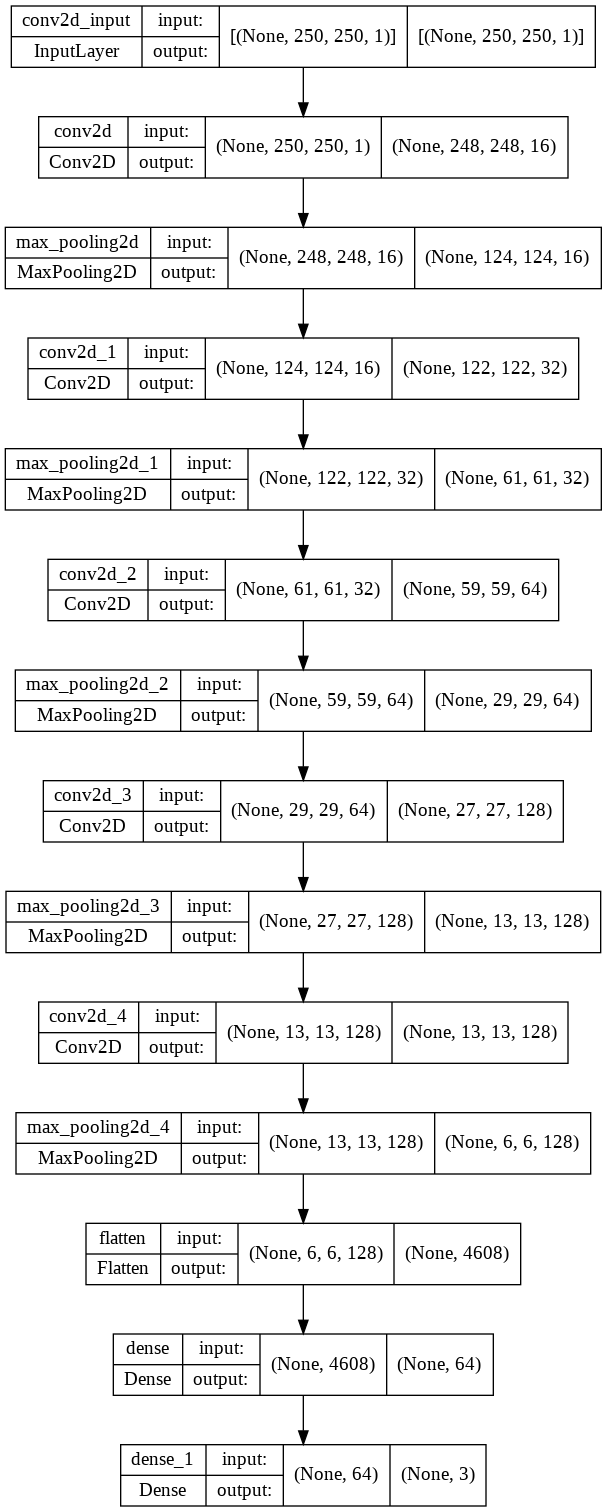

In [ ]:
tf.keras.utils.plot_model(model3,show_shapes=True)

In [ ]:
hiistory3 = model3.fit(train_generator, epochs=15,workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)
# hiistory5 = model5.fit(train_generator, epochs=10,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)
# hiistory7 = model7.fit(train_generator, epochs=10,  callbacks=[early_stopping_callback, reduceLROnPlateau],workers=8, use_multiprocessing=True, verbose=1, validation_data=val_generator)

Epoch 1/15
132/132 [==============================] - ETA: 0s - loss: 1.1019 - accuracy: 0.6079

Process Keras_worker_ForkPoolWorker-19:
Process Keras_worker_ForkPoolWorker-20:
Process Keras_worker_ForkPoolWorker-21:
Process Keras_worker_ForkPoolWorker-18:
Process Keras_worker_ForkPoolWorker-13:
Process Keras_worker_ForkPoolWorker-11:
Process Keras_worker_ForkPoolWorker-23:
Process Keras_worker_ForkPoolWorker-12:
Process Keras_worker_ForkPoolWorker-15:
Process Keras_worker_ForkPoolWorker-17:
Process Keras_worker_ForkPoolWorker-10:
Process Keras_worker_ForkPoolWorker-9:
Process Keras_worker_ForkPoolWorker-16:
Process Keras_worker_ForkPoolWorker-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Keras_worker_ForkPoolWorker-14:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib

KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
 

In [ ]:
test_datagen = ImageDataGenerator(featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
#                                   rotation_range=10,
#                                   zoom_range=0.1,
#                                   width_shift_range=0.1,
#                                   height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=False
                                  )

test_generator = test_datagen.flow_from_directory(
    directory=r"./output/test",
    target_size=(250, 250),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 519 images belonging to 5 classes.


In [ ]:
predictions  = model3.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions.shape

In [ ]:
loss, acc = model3.evaluate_generator(test_generator, workers=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(acc)

0.7341040372848511


In [ ]:
print(loss)

1.3302360773086548


In [ ]:
model3.save('model3_1.h5')

In [ ]:
from matplotlib import pyplot  as plt

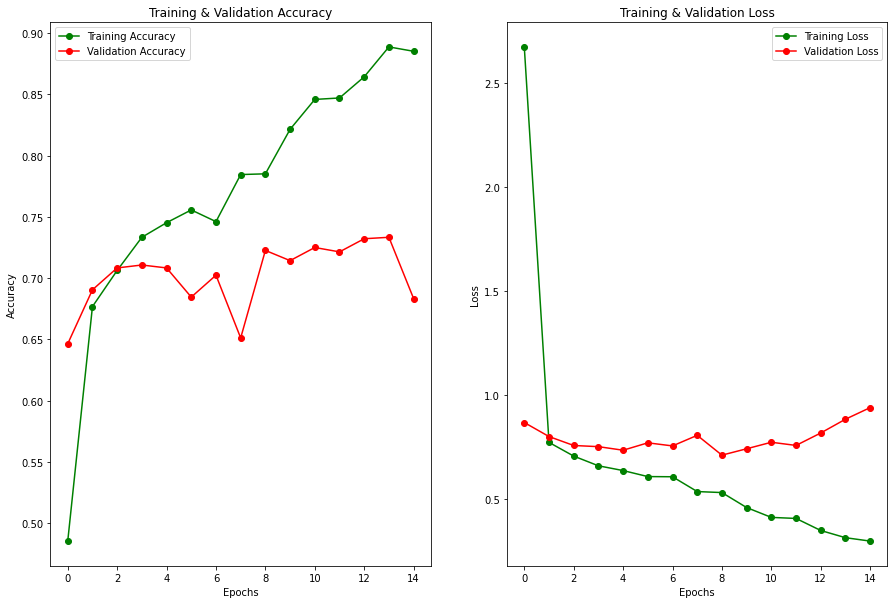

In [ ]:
epochs = [i for i in range(15)]

fig, ax = plt.subplots(1,2)
train_acc = history_wo_ip.history['accuracy']
train_loss = history_wo_ip.history['loss']
val_acc = history_wo_ip.history['val_accuracy']
val_loss = history_wo_ip.history['val_loss']
fig.set_size_inches(15,10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'ro-', label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.savefig('model3_graph.png')

plt.show()



In [ ]:
import numpy as np

# **IMAGE PROCESSING**

In [ ]:
import pathlib
#data_dir = pathlib.Path("../input/bone-marrow-dataset-less/bone_marrow_dataset/dataset")
data_dir = pathlib.Path('/content/drive/MyDrive/bone_marrow_dataset/dataset')

In [ ]:
df = tf.keras.utils.image_dataset_from_directory(data_dir
    ,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6000 files belonging to 3 classes.


In [ ]:
import tensorflow as tf

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(250, 250),batch_size=100,color_mode='grayscale'
  )

Found 6000 files belonging to 3 classes.
Using 4200 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(250, 250),batch_size=100,color_mode='grayscale'
  )

Found 6000 files belonging to 3 classes.
Using 1800 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['ART', 'BLA', 'LYT']


In [ ]:
# input_arr = tf.keras.preprocessing.image.img_to_array(train_ds)

In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]

In [ ]:
images = []
labels = []


for image, label in train_ds.take(100):
    #print("Image shape: ", image.numpy().shape)
    #print("Label: ", label.numpy())
    images.append(image.numpy())
    labels.append(label.numpy())

In [ ]:
images_val = []
labels_val = []


for image, label in val_ds.take(100):
    #print("Image shape: ", image.numpy().shape)
    #print("Label: ", label.numpy())
    images_val.append(image.numpy())
    labels_val.append(label.numpy())

In [ ]:
import numpy as np
#images_np = np.asarray(images)
#images_np.shape
images = np.asarray(images)
images.shape

(42, 100, 250, 250, 1)

In [ ]:
# images_np = (images_np.reshape((7000, 250, 250 ))).astype(np.float32)
# images_np.shape
#images = (images.reshape((7000, 250, 250 ))).astype(np.float32)
images = (images.reshape((4200, 250, 250, 1))).astype(np.float32)
images.shape

(4200, 250, 250, 1)

In [ ]:
import numpy as np
images_val_np = np.asarray(images_val)

In [ ]:
images_val_np = (images_val_np.reshape((1800, 250, 250, 1))).astype(np.float32)

In [ ]:
# labels_np = np.asarray(labels)
# labels_np = labels_np.reshape((7000, 1))
# labels_np.shape
labels = np.asarray(labels)
#labels = labels.reshape((7000, 1))
labels = labels.reshape((4200, 1))
labels.shape

(4200, 1)

In [ ]:
y_labels_final = to_categorical(labels)
y_labels_final.shape

(4200, 3)

In [ ]:
model_wo_ip = my_model3()
history_wo_ip = model_wo_ip.fit(images, y_labels_final, batch_size = 100, epochs = 15, validation_split = 0.2)

Epoch 1/15
34/34 [==============================] - 10s 276ms/step - loss: 2.6744 - accuracy: 0.4854 - val_loss: 0.8674 - val_accuracy: 0.6464
Epoch 2/15
34/34 [==============================] - 9s 264ms/step - loss: 0.7718 - accuracy: 0.6768 - val_loss: 0.7999 - val_accuracy: 0.6905
Epoch 3/15
34/34 [==============================] - 9s 264ms/step - loss: 0.7059 - accuracy: 0.7063 - val_loss: 0.7569 - val_accuracy: 0.7083
Epoch 4/15
34/34 [==============================] - 9s 262ms/step - loss: 0.6592 - accuracy: 0.7333 - val_loss: 0.7513 - val_accuracy: 0.7107
Epoch 5/15
34/34 [==============================] - 9s 262ms/step - loss: 0.6363 - accuracy: 0.7452 - val_loss: 0.7341 - val_accuracy: 0.7083
Epoch 6/15
34/34 [==============================] - 9s 265ms/step - loss: 0.6073 - accuracy: 0.7557 - val_loss: 0.7697 - val_accuracy: 0.6845
Epoch 7/15
34/34 [==============================] - 9s 262ms/step - loss: 0.6064 - accuracy: 0.7461 - val_loss: 0.7548 - val_accuracy: 0.7024
Epoch

In [ ]:
model_wo_ip.evaluate(images_val_np, y_labels_val_final)

57/57 [==============================] - 2s 37ms/step - loss: 0.9533 - accuracy: 0.7078


[0.9533407092094421, 0.7077777981758118]

In [ ]:
labels_val_np = np.asarray(labels_val)
labels_val_np = labels_val_np.reshape((1800, 1))

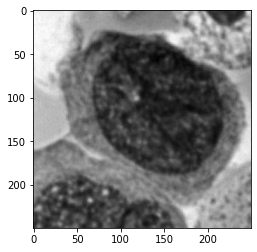

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(images[0],cmap='gray')

In [ ]:
plt.imshow(images_val_np[0],cmap='gray')

NameError: ignored

In [ ]:
images[0].shape

(250, 250)

In [ ]:
images_np = images.astype('float32')

# IMAGE PROCESSING FINALLY HUEHEHEUHEUHEUHEHHE****

In [ ]:
import cv2

# SHARPENING

In [ ]:
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#filter = np.array([[0,0,-1,0,0],[0,-1,-1,-1,0],[-1,-1,12,-1,-1],[0,-1,-1,-1,0],[0,0,-1,0,0]])
sharpen_imgs = []

for x in images_np:
    sharpen_x=cv2.filter2D(x,-1,filter)
    sharpen_imgs.append(sharpen_x)
# cv2.imshow(sharpen_imgs[0])

In [ ]:
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpen_imgs_val = []

for x in images_val_np:
    sharpen_x=cv2.filter2D(x,-1,filter)
    sharpen_imgs_val.append(sharpen_x)

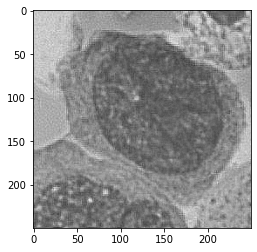

In [ ]:
plt.imshow(sharpen_imgs[0],cmap='gray')

In [ ]:
plt.imshow(sharpen_imgs_val[0],cmap='gray')

NameError: ignored

# CONTRAST STRECHING

In [ ]:
gamma_imgs = []

for x in sharpen_imgs:
    gamma_img = np.array(255*(x / 255) ** 1.75)
    gamma_img[np.isnan(gamma_img)] = 0
    gamma_imgs.append(gamma_img)
#     cv2_imshow(gamma_img)


plt.imshow(gamma_imgs[0],cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


NameError: ignored

In [ ]:
gamma_val_imgs = []

for x in sharpen_imgs_val:
    gamma_img = np.array(255*(x / 255) ** 1.75)
    gamma_img[np.isnan(gamma_img)] = 0
    gamma_val_imgs.append(gamma_img)
#     cv2_imshow(gamma_img)


plt.imshow(gamma_val_imgs[0],cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


NameError: ignored

In [ ]:
gamma_final_imgs = np.asarray(gamma_imgs)
gamma_final_imgs.shape

(4200, 250, 250)

In [ ]:
gamma_final_imgs = (np.asarray(gamma_final_imgs)).reshape((4200, 250, 250, 1))
gamma_final_imgs.shape

(4200, 250, 250, 1)

In [ ]:
gamma_final_imgs_val = np.asarray(gamma_val_imgs)
gamma_final_imgs_val.shape

(1800, 250, 250)

In [ ]:
gamma_final_imgs_val = (np.asarray(gamma_final_imgs_val)).reshape((1800, 250, 250, 1))
gamma_final_imgs_val.shape

(1800, 250, 250, 1)

In [ ]:
#gamma_img = np.power(255*(sharpen_imgs[0] / 255), [1.1])

In [ ]:
#print(type(gamma_imgs[0]))

# EDGE DETECTION

In [ ]:
from google.colab.patches import cv2_imshow

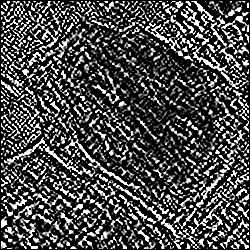

In [ ]:
final_imgs = []
for x in gamma_imgs:
  #sobelx = cv2.Sobel(src=x, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  #sobely = cv2.Sobel(src=x, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src = x, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
  final_imgs.append(sobelxy)
cv2_imshow(final_imgs[0])

In [ ]:
final_val_imgs = []
for x in gamma_val_imgs:
  #sobelx = cv2.Sobel(src=x, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  #sobely = cv2.Sobel(src=x, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src = x, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
  final_val_imgs.append(sobelxy)
cv2_imshow(final_val_imgs[0])

NameError: ignored

In [ ]:
final_imgs = (np.asarray(final_imgs)).reshape((4200, 250, 250, 1))
final_imgs.shape

(4200, 250, 250, 1)

In [ ]:
final_val_imgs = (np.asarray(final_val_imgs)).reshape(1800, 250, 250, 1)
final_val_imgs.shape

(1800, 250, 250, 1)

# IP MODEL

In [ ]:
from tensorflow.keras.utils import to_categorical

y_labels_final = to_categorical(labels)
y_labels_final.shape

(4200, 3)

In [ ]:
y_labels_val_final = to_categorical(labels_val_np)
y_labels_val_final.shape

(1800, 3)

In [ ]:
def my_model3_ip():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(250,250,1)))
    #model.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(250,250)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(128,(1,1),activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation="relu"))
    #model.add(tf.keras.layers.Dense(5,activation="softmax"))
    model.add(tf.keras.layers.Dense(3,activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
ip_model_3 = my_model3_ip()
ip_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [ ]:
#ip_model_3.fit(final_imgs, labels, batch_size = 100, epochs = 10, validation_split = 0.2)
history_ip = ip_model_3.fit(gamma_final_imgs, y_labels_final, batch_size = 100, epochs = 15, validation_split = 0.2)

Epoch 1/15
34/34 [==============================] - 15s 326ms/step - loss: 3.2012 - accuracy: 0.5560 - val_loss: 0.8646 - val_accuracy: 0.6226
Epoch 2/15
34/34 [==============================] - 9s 268ms/step - loss: 0.7870 - accuracy: 0.6768 - val_loss: 0.7936 - val_accuracy: 0.6738
Epoch 3/15
34/34 [==============================] - 9s 264ms/step - loss: 0.7120 - accuracy: 0.7068 - val_loss: 0.7741 - val_accuracy: 0.7012
Epoch 4/15
34/34 [==============================] - 9s 264ms/step - loss: 0.6599 - accuracy: 0.7354 - val_loss: 0.7536 - val_accuracy: 0.6893
Epoch 5/15
34/34 [==============================] - 9s 263ms/step - loss: 0.6042 - accuracy: 0.7530 - val_loss: 0.7174 - val_accuracy: 0.7333
Epoch 6/15
34/34 [==============================] - 9s 267ms/step - loss: 0.5506 - accuracy: 0.7875 - val_loss: 0.7171 - val_accuracy: 0.7155
Epoch 7/15
34/34 [==============================] - 9s 264ms/step - loss: 0.4871 - accuracy: 0.8098 - val_loss: 0.7672 - val_accuracy: 0.7000
Epoch

In [ ]:
ip_model_3.save('ip_model_new.h5')

In [ ]:
ip_model_3 = load_model('/content/ip_model.h5')

In [ ]:
ip_model_3.evaluate(gamma_final_imgs_val, y_labels_val_final)

57/57 [==============================] - 3s 39ms/step - loss: 1.0045 - accuracy: 0.7594


[1.0044543743133545, 0.7594444155693054]